In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
import datetime
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB as MNB, CategoricalNB as CNB
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc, precision_score as prec, recall_score as rec, f1_score as f1, roc_auc_score as roc
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import xgboost as xgb
import pickle

In [51]:
file = pd.read_csv('true_data.csv')
select = ['OUTCOME','Gender','intubated','pneumonia','pregnant','Diabetes','asthma','hypertension','another_comorbidity','cardiovascular','obesity','renal_chronicle','smoking','another_case']
file = file[select + ['ICU']]
file.head()

,OUTCOME,Gender,intubated,pneumonia,pregnant,Diabetes,asthma,hypertension,another_comorbidity,cardiovascular,obesity,renal_chronicle,smoking,another_case,ICU
0,0,1,0,0,0,1,0,1,0,0,1,0,1,2,0
1,1,0,0,1,2,0,0,0,0,0,0,0,0,2,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,2,0
3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,2,0,0,0,0,0,0,0,0,2,0


In [52]:

# print(select)
x = np.array(file[select])
y = file['ICU']

print(x.shape, y.shape)

(3462, 14) (3462,)


In [53]:
import sklearn.model_selection

x_train,x_test, y_train,y_test = sklearn.model_selection.train_test_split(x,y, stratify=y, shuffle=True, test_size=0.2)

print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(2769, 14) (693, 14) (2769,) (693,)


In [5]:
corrMatrix = file[select + ['ICU']].corr()
print (corrMatrix)

                      OUTCOME    Gender  intubated  pneumonia  pregnant  \
OUTCOME              1.000000 -0.041520  -0.001670   0.042721  0.031993   
Gender              -0.041520  1.000000  -0.035304  -0.024058 -0.948017   
intubated           -0.001670 -0.035304   1.000000   0.156149  0.020549   
pneumonia            0.042721 -0.024058   0.156149   1.000000  0.011176   
pregnant             0.031993 -0.948017   0.020549   0.011176  1.000000   
Diabetes             0.027429 -0.024864  -0.020910   0.015199 -0.002045   
asthma               0.029025 -0.003965  -0.068351  -0.013896 -0.012444   
hypertension         0.038394 -0.040546  -0.028263   0.019479  0.014199   
another_comorbidity -0.009844 -0.040365  -0.057289   0.048163  0.017809   
cardiovascular       0.015519 -0.060295  -0.051743   0.033706  0.027054   
obesity              0.073642  0.003713  -0.024193   0.025817 -0.016775   
renal_chronicle      0.003215 -0.065521  -0.047633  -0.005149  0.035952   
smoking              0.01

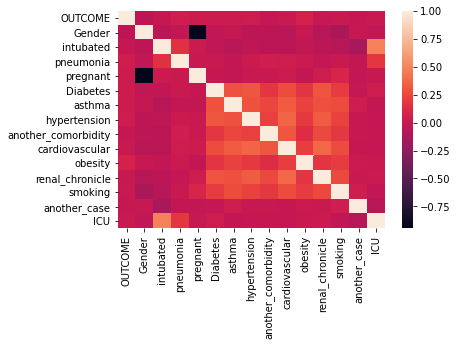

In [6]:
import seaborn as sns

ax = sns.heatmap(corrMatrix)

plt.savefig('Plots/heatmap.jpg')
plt.show()

# Naive Bayes 

acc 0.8354978354978355
prec 0.6666666666666666
rec 0.5384615384615384
f1 0.5957446808510638
roc 0.7301246239793725


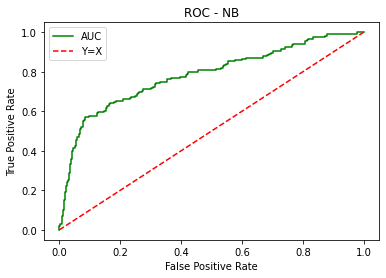

In [38]:
mnb = CNB(fit_prior=True)
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(mnb,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC - NB')
plt.savefig('Plots/NB_3d.jpg')
plt.show()

In [39]:
pickle.dump(mnb, open('Best_model_NB.sav','wb'))

acc 0.8326118326118326
prec 0.6639344262295082
rec 0.5192307692307693
f1 0.5827338129496403
roc 0.7214403380604498


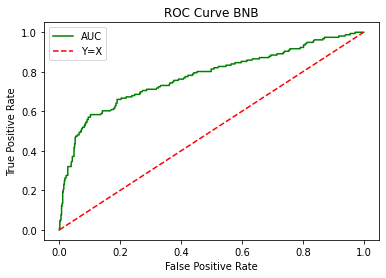

In [8]:
from sklearn.naive_bayes import BernoulliNB as BNB

bnb = BNB(fit_prior=True)
bnb.fit(x_train,y_train)

y_pred = bnb.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(bnb,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC Curve BNB')
plt.savefig('Plots/NB_BNB.jpg')
plt.show()

# SVM

acc 0.8297258297258298
prec 0.6357142857142857
rec 0.5705128205128205
f1 0.6013513513513513
roc 0.7377703767368572


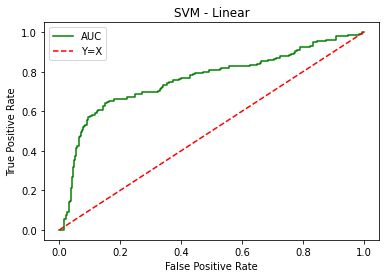

In [9]:
svm_l = SVC(kernel='linear')
svm_l.fit(x_train,y_train)

y_pred = svm_l.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(svm_l,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('SVM - Linear')
plt.savefig('Plots/SVM_lin.jpg')
plt.show()
# plt.show()

acc 0.836940836940837
prec 0.6666666666666666
rec 0.5512820512820513
f1 0.6035087719298246
roc 0.7356037816931672


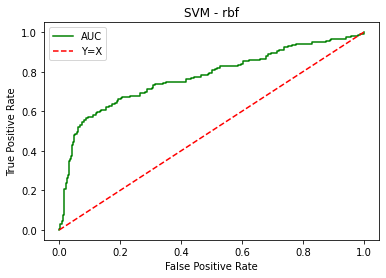

In [10]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)

y_pred = svm_rbf.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(svm_rbf,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('SVM - rbf')
plt.savefig('Plots/SVM_rbf.jpg')
plt.show()

In [40]:
pickle.dump(svm_rbf, open('Best_model_SVM.sav','wb'))

acc 0.8383838383838383
prec 0.6964285714285714
rec 0.5
f1 0.582089552238806
roc 0.7183426443202979


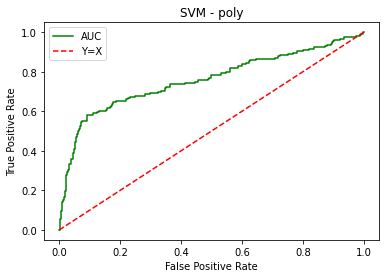

In [11]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train,y_train)

y_pred = svm_poly.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(svm_poly,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('SVM - poly')
plt.savefig('Plots/SVM_poly.jpg')
plt.show()

F1-score 0.5366931981326125
Recall 0.4853029049457621
Precision 0.6097275542561988
Roc_Auc 0.7863664896779874


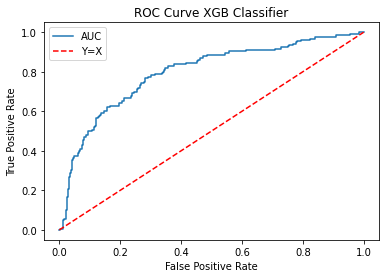

In [13]:
model_xgboost_c = xgb.XGBClassifier(eval_metric='auc')
#reg_alpha=0.55,reg_lambda=1,learning_rate = 0.005,max_depth=8,n_estimators=150, random_state=42, n_jobs=-1, subsample=0.8, 

scores1 = cross_validate(model_xgboost_c, x, y, cv=7, scoring=('f1','recall','precision','roc_auc'))

model_xgboost_c.fit(x_train,y_train)

print("F1-score",np.mean(scores1['test_f1']))
print("Recall",np.mean(scores1['test_recall']))
print("Precision",np.mean(scores1['test_precision']))
print("Roc_Auc",np.mean(scores1['test_roc_auc']))
metrics.plot_roc_curve(model_xgboost_c,x_test,y_test)
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC Curve XGB Classifier')
# plt.savefig('Plots/1ROC_XGBC_top' + str(v) + '.jpg')
plt.show()

F1-score 0.5770391840082327
Recall 0.5223655913978494
Precision 0.6536427471950186
Roc_Auc 0.774494727716708


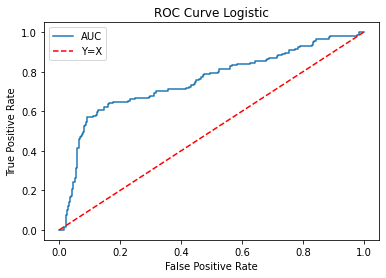

In [14]:
model_logistic = LogisticRegression()

scores1 = cross_validate(model_logistic, x, y, cv=5, scoring=('f1','recall','precision','roc_auc'))

model_logistic.fit(x_train,y_train)

print("F1-score",np.mean(scores1['test_f1']))
print("Recall",np.mean(scores1['test_recall']))
print("Precision",np.mean(scores1['test_precision']))
print("Roc_Auc",np.mean(scores1['test_roc_auc']))
metrics.plot_roc_curve(model_logistic,x_test,y_test)
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC Curve Logistic')
# plt.savefig('Plots/1ROC_Logi_top' + str(v) + '.jpg')
plt.show()

# Bagging

In [19]:
def bagging(mod,name):
    import random
    def generate_sample(X,y):
        #Generating Samples of lenght len(X) by resampling
        X_sample=[]
        y_sample=[]
        for i in range(len(X)):
            index=random.randint(0,len(X)-1)
            X_sample.append(X[index])
            y_sample.append(y[index])
        return [np.array(X_sample),np.array(y_sample)]
    Xtrain=np.array(x_train)
    ytrain=np.array(y_train)
    Xtest=np.array(x_test)
    ytest=np.array(y_test)
    B=100                 #forming 20 models and boot strp samples
    Samples=[]
    Models=[]
    for b in range(B):               #Doing bootstrapping
        print(b,end=" ")
        Samples.append(generate_sample(Xtrain,ytrain))
        model = mod
        model.fit(Samples[-1][0],Samples[-1][1])
        Models.append(model)
    predicted=[]               #predicting ans
    for b in range(B):
        predicted.append(np.array(Models[b].predict(Xtest)))
    predicted=np.array(predicted,dtype=np.float64)
    
    y_pred=np.mean(predicted,axis=0)

    y_pred=np.where(y_pred>0.43,1,0)
    y_pred
    print('Accuracy',acc(ytest, y_pred))
    print('Precision',prec(ytest, y_pred))
    print('Recall',rec(ytest, y_pred))
    print('F1-score',f1(ytest, y_pred))
    print('Roc_Auc',roc(ytest, y_pred))
    metrics.plot_roc_curve(mod,x_test,y_test)
    
    plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
    plt.legend(['AUC','Y=X'])
    plt.title('ROC Curve' + ' '+name)
#     plt.savefig('Plots/Boost_ROC_'+name+'_top' + str(v) + '.jpg')
    plt.show()

# Bagging XGB

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Accuracy 0.7893217893217893
Precision 0.5396825396825397
Recall 0.4358974358974359
F1-score 0.48226950354609927
Roc_Auc 0.6639449935539321


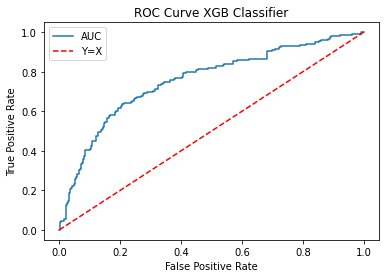

In [20]:
mod = xgb.XGBClassifier(eval_metric='auc')
bagging(mod, 'XGB Classifier')

# Bagging Logistic

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Accuracy 0.8268398268398268
Precision 0.6607142857142857
Recall 0.47435897435897434
F1-score 0.5522388059701493
Roc_Auc 0.7017977367139379


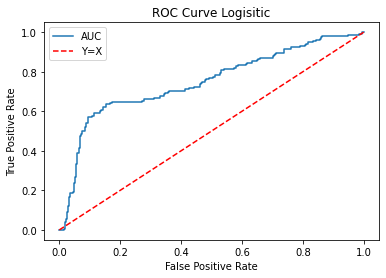

In [21]:
mod = LogisticRegression()
bagging(mod, 'Logisitic')

# Bagging NAive Bayes

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Accuracy 0.8398268398268398
Precision 0.6744186046511628
Recall 0.5576923076923077
F1-score 0.6105263157894736
Roc_Auc 0.7397400085947572


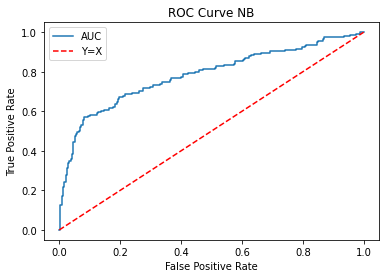

In [24]:
mod = CNB(fit_prior=True)
bagging(mod, 'NB')

# Bagging SVM

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Accuracy 0.8412698412698413
Precision 0.7017543859649122
Recall 0.5128205128205128
F1-score 0.5925925925925926
Roc_Auc 0.7247529007305543


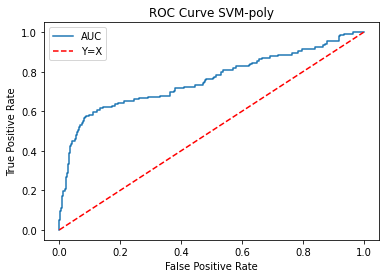

In [26]:
mod = SVC(kernel='rbf')
bagging(mod, 'SVM-poly')

# Stacking and Bagging

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
level0 = list()
level0.append(('cnb', CNB()))
level0.append(('svml', SVC(kernel='linear')))
level0.append(('rf', RandomForestClassifier()))
level0.append(('svmr', SVC(kernel='rbf')))
level0.append(('xg', xgb.XGBClassifier(eval_metric='auc')))
level0.append(('bnb', BNB()))
level1 = LogisticRegression()

In [32]:
import random
def generate_sample(X,y):
    #Generating Samples of lenght len(X) by resampling
    X_sample=[]
    y_sample=[]
    for i in range(len(X)):
        index=random.randint(0,len(X)-1)
        X_sample.append(X[index])
        y_sample.append(y[index])
    return [np.array(X_sample),np.array(y_sample)]

In [54]:
Xtrain=np.array(x_train)
ytrain=np.array(y_train)
Xtest=np.array(x_test)
ytest=np.array(y_test)
B= 50                  #forming 20 models and boot strp samples
Samples=[]
Models=[]
for b in range(B):               #Doing bootstrapping
    print(b)
    Samples.append(generate_sample(Xtrain,ytrain))
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    # fit the model on all available data
    model.fit(Xtrain, ytrain)
    Models.append(model)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


# ADA Boosting

Accuracy 0.836940836940837
Precision 0.672
Recall 0.5384615384615384
"F1-score" 0.5978647686832741
Roc_Auc 0.7310557226758344


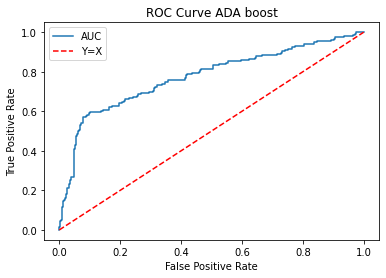

In [36]:
from sklearn.ensemble import AdaBoostClassifier as ADA
mod = ADA(n_estimators=100, random_state=0)

mod.fit(x_train,y_train)

y_pred = mod.predict(x_test)

print('Accuracy',acc(y_test, y_pred))
print('Precision',prec(y_test, y_pred))
print('Recall',rec(y_test, y_pred))
print('"F1-score"',f1(y_test, y_pred))
print('Roc_Auc',roc(y_test, y_pred))

metrics.plot_roc_curve(mod,x_test,y_test)

plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC Curve ADA boost')
plt.savefig('Plots/ROC_ADA.jpg')
plt.show()

# TOP Feature Selection

In [41]:
a = ['OUTCOME','Gender','intubated','pneumonia','pregnant','Diabetes','asthma','hypertension','another_comorbidity','cardiovascular','obesity','renal_chronicle','smoking','another_case']
b = list(corrMatrix['ICU'])
feat = [[b[i],a[i]] for i in range(len(a))]
feat.sort(reverse=True)

In [42]:
v = 10
sel_feat_top_5 = [feat[i][1] for i in range(v)]
sel_feat_top_5

['intubated',
 'pneumonia',
 'Diabetes',
 'renal_chronicle',
 'obesity',
 'OUTCOME',
 'pregnant',
 'another_comorbidity',
 'hypertension',
 'cardiovascular']

In [44]:
x = np.array(file[sel_feat_top_5])
y = file['ICU']

print(x.shape, y.shape)

(3462, 10) (3462,)


In [45]:
import sklearn.model_selection

x_train,x_test, y_train,y_test = sklearn.model_selection.train_test_split(x,y, stratify=y, shuffle=True, test_size=0.2)

print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(2769, 10) (693, 10) (2769,) (693,)


# SVM

acc 0.8441558441558441
prec 0.6578947368421053
rec 0.6410256410256411
f1 0.6493506493506495
roc 0.7720956882968055


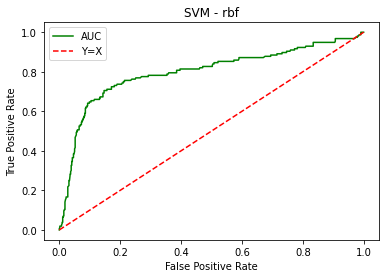

In [46]:
svm_poly = SVC(kernel='rbf')
svm_poly.fit(x_train,y_train)

y_pred = svm_poly.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(svm_poly,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('SVM - rbf')
plt.savefig('Plots/1SVM_poly_top' + str(v) + '.jpg')
plt.show()

# Naive Bayes

acc 0.8383838383838383
prec 0.6549295774647887
rec 0.5961538461538461
f1 0.6241610738255035
roc 0.7524530869502938


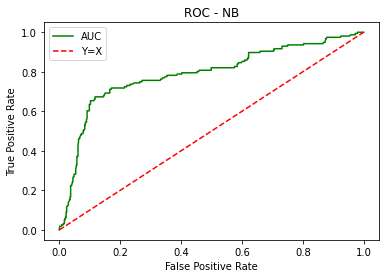

In [49]:
mnb = CNB(fit_prior=True)
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)

print('acc',acc(y_test, y_pred))
print('prec',prec(y_test, y_pred))
print('rec',rec(y_test, y_pred))
print('f1',f1(y_test, y_pred))
print('roc',roc(y_test, y_pred))

metrics.plot_roc_curve(mnb,x_test,y_test,color='g')
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC - NB')
plt.savefig('Plots/1NB_top' + str(v) + '.jpg')
plt.show()

# XGB

F1-score 0.590021056215878
Recall 0.5456310902739474
Precision 0.645168392739181
Roc_Auc 0.782364916944773


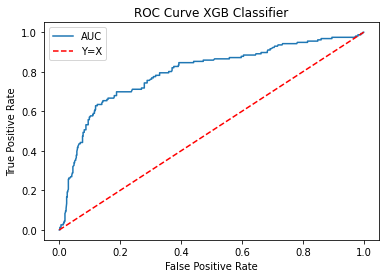

In [48]:
model_xgboost_c = xgb.XGBClassifier(eval_metric='auc')
#reg_alpha=0.55,reg_lambda=1,learning_rate = 0.005,max_depth=8,n_estimators=150, random_state=42, n_jobs=-1, subsample=0.8, 

scores1 = cross_validate(model_xgboost_c, x, y, cv=7, scoring=('f1','recall','precision','roc_auc'))

model_xgboost_c.fit(x_train,y_train)

print("F1-score",np.mean(scores1['test_f1']))
print("Recall",np.mean(scores1['test_recall']))
print("Precision",np.mean(scores1['test_precision']))
print("Roc_Auc",np.mean(scores1['test_roc_auc']))
metrics.plot_roc_curve(model_xgboost_c,x_test,y_test)
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC Curve XGB Classifier')
plt.savefig('Plots/1ROC_XGBC_top' + str(v) + '.jpg')
plt.show()

# Logistic

F1-score 0.5799488493509315
Recall 0.5262034739454095
Precision 0.6531184286836788
Roc_Auc 0.78426259322108


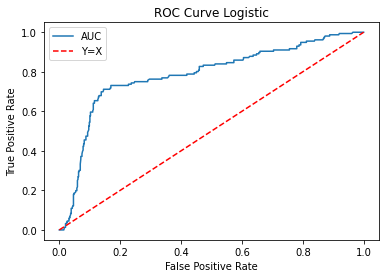

In [47]:
model_logistic = LogisticRegression()

scores1 = cross_validate(model_logistic, x, y, cv=5, scoring=('f1','recall','precision','roc_auc'))

model_logistic.fit(x_train,y_train)

print("F1-score",np.mean(scores1['test_f1']))
print("Recall",np.mean(scores1['test_recall']))
print("Precision",np.mean(scores1['test_precision']))
print("Roc_Auc",np.mean(scores1['test_roc_auc']))
metrics.plot_roc_curve(model_logistic,x_test,y_test)
plt.plot([i/100 for i in range(0,101,2)],[i/100 for i in range(0,101,2)],'r--')
plt.legend(['AUC','Y=X'])
plt.title('ROC Curve Logistic')
plt.savefig('Plots/1ROC_Logi_top' + str(v) + '.jpg')
plt.show()